# 5. K-Means

In [1]:
 # 경고메세지에 대한 대응
import os  
os.environ['OMP_NUM_THREADS'] = '1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [4]:
# K-Means는 비지도 학습이므로 종속변수 없음, 즉 y가 필요없음
X = dataset.iloc[:, :].values
# X = dataset.values 와 똑같은 동작을 함
# X =dataset.to_numpy()   -> 공식 홈페이지 권장방식이나 우리는 쓰던 방식을 통일해서 쓰기 때문에 2행코드로 진행
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포 확인)

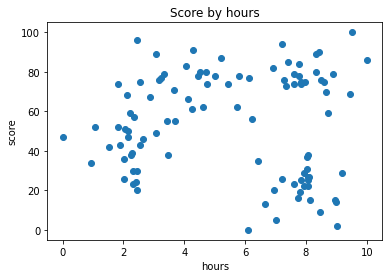

In [5]:
plt.scatter(X[:, 0], X[:, 1])   # x축 ; hour, y축 ; score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (축 범위 통일)

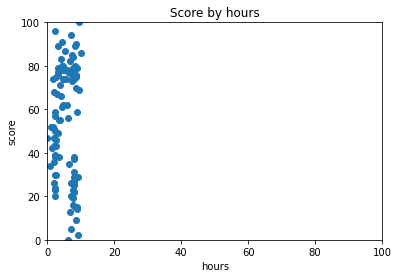

In [6]:
plt.scatter(X[:, 0], X[:, 1])   # x축 ; hour, y축 ; score
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylabel('score')
plt.ylim(0, 100)
plt.show()

### 피처 스케일링 (Feature Scaling)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링된 데이터)

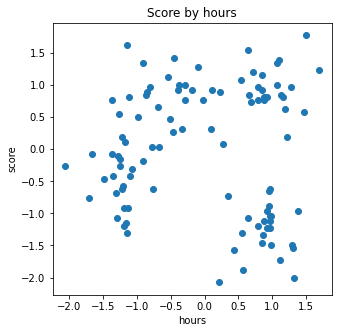

In [8]:
plt.figure(figsize = (5, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 최적의 K값 찾기 (엘보우 방식 Elbow Method)

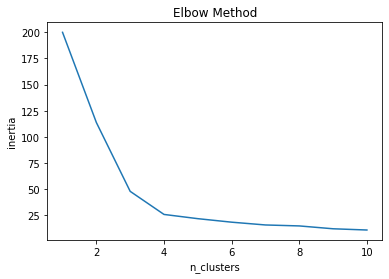

In [13]:
from sklearn.cluster import KMeans

# 반복문을 통해 클러스터를 변형시켜가며 중심점까지의 거리 제곱의 합이 어떻게 줄어드는지 그래프로 그려보기
# 각 지점들로부터 중심점까지의 거리 제곱의 합을 클러스터 갯수 변할 때마다 따로 저장 -> 이들을 그래프로 그려보기
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)    # init = 'k-means++' ; k-means++로 사용하기 위한 과정
    kmeans.fit(X)   # 지도학습과는 다르게 y가 없으므로 X만 넣어줌
    inertia_list.append(kmeans.inertia_)   # 각 지점으로부터 클러스터의 중심(centroid)까지의 거리의 제곱의 합을 하나씩 리스트에 넣어줌

    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')  # 클러스터 갯수
plt.ylabel('inertia')  # 거리의 제곱 합
plt.show()

### 최적의 K(4) 값으로 KMeans 학습

In [14]:
K = 4   # 최적의 K값

In [15]:
# kmeans = KMeans(n_clusters = K, init = 'kmeans++', random_state = 0) 
kmeans = KMeans(n_clusters = K, random_state = 0)   
# init 속성의 디폴트 값이 kmeans++이라 init = 'kmeans++' 굳이 안적어줘도 됨
y_kmeans = kmeans.fit_predict(X)  # X 데이터를 넣어서 학습(fit)을 하고, 이를 통해 예측되는 값을 받아와서 반환

In [16]:
y_kmeans
# 클러스터가 4개니까 0 1 2 3 에 해당하는 y값을 가져온 것을 알 수 있다.

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

### 데이터 시각화 (최적의 K)

In [19]:
centers = kmeans.cluster_centers_   # 클러스터의 중심점(centroid) 좌표를 가지고 있는 정보
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

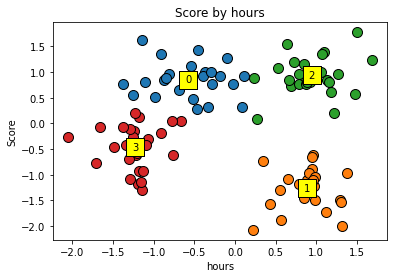

In [22]:
# 각 클러스터의 색깔을 다르게 하여 그래프에 표현 -> 반복문 이용
for cluster in range(K):   # K = 4 이므로 0 1 2 3까지 총 4번반복
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')   
    # 0과 1은 컬럼0, 컬럼1을 의미 // plt.scatter(X값, y값) // s = 데이터 사이즈 // edgecolor = 테두리 색깔 설정
    
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s = 300, edgecolor = 'black', color = 'yellow', marker = 's')
    # 데이터 모양 marker = 's' (;square)
    
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va = 'center', ha = 'center')
    # 클러스터 텍스트 출력
    # 몇 번째 클러스터인지 숫자 넣어주기
    # va ; vertical alignment 세로 조정
    # ha ; horizontal alignment 가로 조정

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()
    

### 데이터 시각화 (스케일링 원복)

In [23]:
X_org = sc.inverse_transform(X)   # Feature Scaling된 데이터를 다시 원복하는 작업
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [25]:
# centroid 의 좌표도 원복시키자

centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

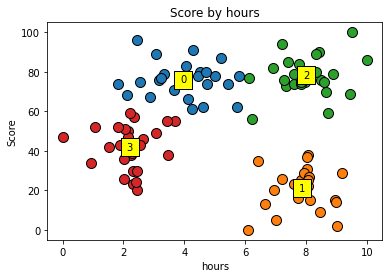

In [26]:
# 원복된 데이터를 그대로 시각화에 반영

# 각 클러스터의 색깔을 다르게 하여 그래프에 표현 -> 반복문 이용
for cluster in range(K):   # K = 4 이므로 0 1 2 3까지 총 4번반복
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s = 100, edgecolor = 'black')   
    # 0과 1은 컬럼0, 컬럼1을 의미 // plt.scatter(X값, y값) // s = 데이터 사이즈 // edgecolor = 테두리 색깔 설정
    
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s = 300, edgecolor = 'black', color = 'yellow', marker = 's')
    # 데이터 모양 marker = 's' (;square)
    
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va = 'center', ha = 'center')
    # 클러스터 텍스트 출력
    # 몇 번째 클러스터인지 숫자 넣어주기
    # va ; vertical alignment 세로 조정
    # ha ; horizontal alignment 가로 조정

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()

In [27]:
# 데이터를 바탕으로 확인가능한 사실
# 0번째 그룹 ; 공부시간은 적은데 상대적으로 점수가 높음, 공부 효율성 높음, 성능 good
# 1번째 그룹 ; 공부시간은 많은데 점수가 낮다, 공부 효율성 낮음, 집중도가 낮음을 유추가능
# 2번째 그룹 ; 공부시간도 많고, 점수도 높다, 정직, 좀 더 효율적으로 공부하여 0번째 그룹으로 이동하도록
# 3번째 그룹 ; 공부시간도 적고, 점수도 낮다,